# 숙명여자대학교 기계시스템학부 딥러닝 2024: Lab3

## Topic: **CNN & Transfer Learning**
## (강사: 심주용)


# CNN MNIST Example

Here's a complete PyTorch code snippet for classifying the MNIST dataset using a Convolutional Neural Network (CNN). This example covers the full process: loading the data, defining the model, training the model, and evaluating its performance.

## CNN with Dropout
Step-by-step tutorial on how to perform MNIST classification using PyTorch. MNIST is a dataset of handwritten digits, commonly used for training various image processing systems. This dataset contains 60,000 training images and 10,000 testing images, each being a 28x28 pixel grayscale image of a digit from 0 to 9.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader

# Step 1: Define the transformations and load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net = Net().to(device)
net = Net()

# Step 3: Define a Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 4: Train the Network
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print every 200 mini-batches
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 5: Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')


```
Epoch 1, Batch 200, Loss: 0.516, Accuracy: 89.91%
Epoch 1, Batch 400, Loss: 0.198, Accuracy: 94.05%
Epoch 1, Batch 600, Loss: 0.167, Accuracy: 95.05%
Epoch 1, Batch 800, Loss: 0.141, Accuracy: 95.92%
Epoch 2, Batch 200, Loss: 0.105, Accuracy: 96.75%
Epoch 2, Batch 400, Loss: 0.108, Accuracy: 96.85%
Epoch 2, Batch 600, Loss: 0.103, Accuracy: 97.00%
Epoch 2, Batch 800, Loss: 0.096, Accuracy: 97.27%
Epoch 3, Batch 200, Loss: 0.084, Accuracy: 97.30%
Epoch 3, Batch 400, Loss: 0.077, Accuracy: 97.56%
Epoch 3, Batch 600, Loss: 0.075, Accuracy: 97.78%
Epoch 3, Batch 800, Loss: 0.069, Accuracy: 97.80%
Epoch 4, Batch 200, Loss: 0.069, Accuracy: 97.86%
Epoch 4, Batch 400, Loss: 0.070, Accuracy: 97.78%
Epoch 4, Batch 600, Loss: 0.067, Accuracy: 97.91%
Epoch 4, Batch 800, Loss: 0.062, Accuracy: 98.18%
Epoch 5, Batch 200, Loss: 0.057, Accuracy: 98.04%
Epoch 5, Batch 400, Loss: 0.050, Accuracy: 98.55%
Epoch 5, Batch 600, Loss: 0.055, Accuracy: 98.35%
Epoch 5, Batch 800, Loss: 0.061, Accuracy: 98.09%
Epoch 6, Batch 200, Loss: 0.048, Accuracy: 98.31%
Epoch 6, Batch 400, Loss: 0.047, Accuracy: 98.57%
Epoch 6, Batch 600, Loss: 0.049, Accuracy: 98.52%
Epoch 6, Batch 800, Loss: 0.045, Accuracy: 98.57%
Epoch 7, Batch 200, Loss: 0.036, Accuracy: 98.61%
Epoch 7, Batch 400, Loss: 0.042, Accuracy: 98.75%
Epoch 7, Batch 600, Loss: 0.045, Accuracy: 98.65%
Epoch 7, Batch 800, Loss: 0.047, Accuracy: 98.50%
Epoch 8, Batch 200, Loss: 0.036, Accuracy: 98.74%
Epoch 8, Batch 400, Loss: 0.041, Accuracy: 98.66%
Epoch 8, Batch 600, Loss: 0.036, Accuracy: 98.80%
Epoch 8, Batch 800, Loss: 0.039, Accuracy: 98.77%
Epoch 9, Batch 200, Loss: 0.035, Accuracy: 98.71%
Epoch 9, Batch 400, Loss: 0.040, Accuracy: 98.79%
Epoch 9, Batch 600, Loss: 0.037, Accuracy: 98.83%
Epoch 9, Batch 800, Loss: 0.039, Accuracy: 98.78%
Epoch 10, Batch 200, Loss: 0.033, Accuracy: 98.76%
Epoch 10, Batch 400, Loss: 0.035, Accuracy: 98.73%
Epoch 10, Batch 600, Loss: 0.036, Accuracy: 98.83%
Epoch 10, Batch 800, Loss: 0.034, Accuracy: 98.84%
Finished Training

Accuracy of the network on the 10,000 test images: 98.28%
//
Accuracy of the network on the 10,000 test images: 98.44%

```

In [ ]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net.parameters())
print(f"Total Parameters: {total_params/1000} k")

# prompt: save the model with the name including dropout
torch.save(net.state_dict(), 'minst_net_with_dropout.pt')


Total Parameters: 1199.882 k


## CNN with Global Average Pooling

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Step 1: Load the MNIST dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture with Global Average Pooling
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print every 200 mini-batches
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')


Epoch 1, Batch 200, Loss: 1.309, Accuracy: 56.82%
Epoch 1, Batch 400, Loss: 0.639, Accuracy: 81.56%
Epoch 1, Batch 600, Loss: 0.393, Accuracy: 88.91%
Epoch 1, Batch 800, Loss: 0.262, Accuracy: 93.00%
Epoch 2, Batch 200, Loss: 0.213, Accuracy: 94.03%
Epoch 2, Batch 400, Loss: 0.185, Accuracy: 94.62%
Epoch 2, Batch 600, Loss: 0.170, Accuracy: 95.22%
Epoch 2, Batch 800, Loss: 0.146, Accuracy: 95.66%
Epoch 3, Batch 200, Loss: 0.136, Accuracy: 95.97%
Epoch 3, Batch 400, Loss: 0.136, Accuracy: 95.66%
Epoch 3, Batch 600, Loss: 0.130, Accuracy: 96.20%
Epoch 3, Batch 800, Loss: 0.130, Accuracy: 96.02%
Epoch 4, Batch 200, Loss: 0.104, Accuracy: 96.76%
Epoch 4, Batch 400, Loss: 0.117, Accuracy: 96.33%
Epoch 4, Batch 600, Loss: 0.102, Accuracy: 96.85%
Epoch 4, Batch 800, Loss: 0.095, Accuracy: 97.10%
Epoch 5, Batch 200, Loss: 0.098, Accuracy: 97.01%
Epoch 5, Batch 400, Loss: 0.093, Accuracy: 97.21%
Epoch 5, Batch 600, Loss: 0.090, Accuracy: 97.27%
Epoch 5, Batch 800, Loss: 0.080, Accuracy: 97.64%


In [ ]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net.parameters())
print(f"Total Parameters: {total_params/1000} k")


Total Parameters: 331.402 k


## CNN with GAP and larger # of parameters

Epoch 1, Batch 200, Loss: 0.539, Accuracy: 85.42%
Epoch 1, Batch 400, Loss: 0.121, Accuracy: 96.52%
Epoch 1, Batch 600, Loss: 0.101, Accuracy: 97.05%
Epoch 1, Batch 800, Loss: 0.075, Accuracy: 97.74%
Epoch 2, Batch 200, Loss: 0.052, Accuracy: 98.48%
Epoch 2, Batch 400, Loss: 0.064, Accuracy: 98.09%
Epoch 2, Batch 600, Loss: 0.054, Accuracy: 98.52%
Epoch 2, Batch 800, Loss: 0.043, Accuracy: 98.59%
Epoch 3, Batch 200, Loss: 0.038, Accuracy: 98.68%
Epoch 3, Batch 400, Loss: 0.041, Accuracy: 98.60%
Epoch 3, Batch 600, Loss: 0.037, Accuracy: 98.77%
Epoch 3, Batch 800, Loss: 0.041, Accuracy: 98.69%
Epoch 4, Batch 200, Loss: 0.038, Accuracy: 98.70%
Epoch 4, Batch 400, Loss: 0.033, Accuracy: 99.02%
Epoch 4, Batch 600, Loss: 0.030, Accuracy: 99.09%
Epoch 4, Batch 800, Loss: 0.033, Accuracy: 98.95%
Epoch 5, Batch 200, Loss: 0.021, Accuracy: 99.31%
Epoch 5, Batch 400, Loss: 0.025, Accuracy: 99.18%
Epoch 5, Batch 600, Loss: 0.031, Accuracy: 99.02%
Epoch 5, Batch 800, Loss: 0.029, Accuracy: 99.09%


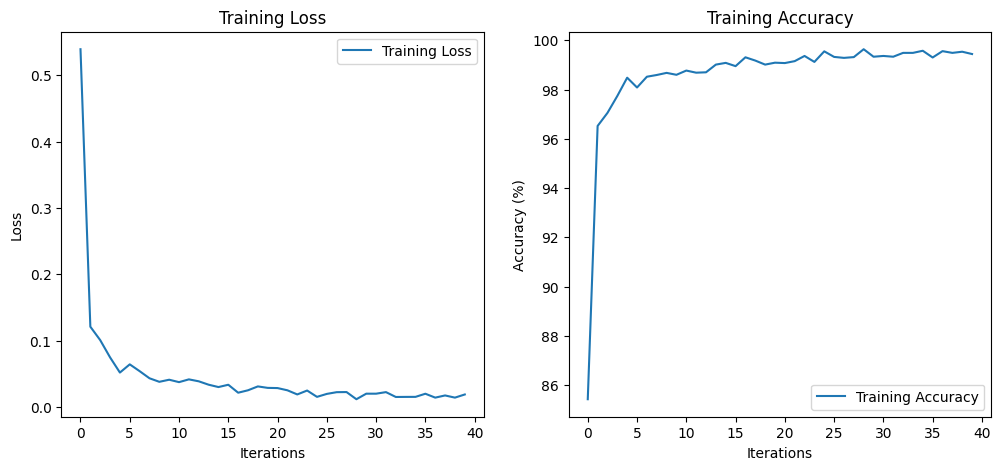

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture with Global Average Pooling
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


In [ ]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net.parameters())
print(f"Total Parameters: {total_params/1000} k")


Total Parameters: 1069.834 k


## Train & Validation Split

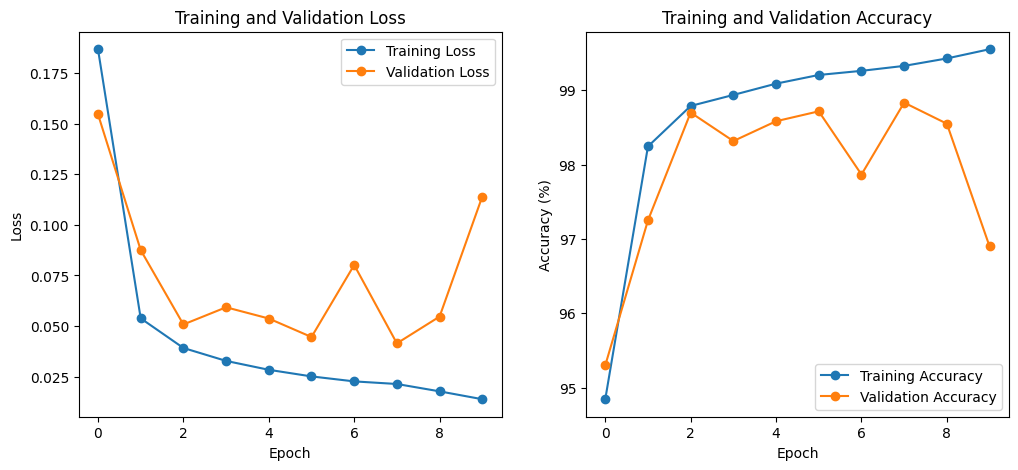

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)

# Create a stratified split for the training and validation datasets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
targets = trainset.targets.numpy()
for train_index, val_index in sss.split(np.zeros(len(targets)), targets):
    train_sampler = SubsetRandomSampler(train_index)
    val_sampler = SubsetRandomSampler(val_index)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture with Global Average Pooling
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    net.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

```
poch 1 - Training Loss: 0.187, Accuracy: 94.84%, Validation Loss: 0.155, Accuracy: 95.30%
Epoch 2 - Training Loss: 0.054, Accuracy: 98.24%, Validation Loss: 0.088, Accuracy: 97.25%
Epoch 3 - Training Loss: 0.039, Accuracy: 98.79%, Validation Loss: 0.051, Accuracy: 98.70%
Epoch 4 - Training Loss: 0.033, Accuracy: 98.94%, Validation Loss: 0.059, Accuracy: 98.32%
Epoch 5 - Training Loss: 0.028, Accuracy: 99.09%, Validation Loss: 0.054, Accuracy: 98.58%
Epoch 6 - Training Loss: 0.025, Accuracy: 99.21%, Validation Loss: 0.045, Accuracy: 98.72%
Epoch 7 - Training Loss: 0.023, Accuracy: 99.26%, Validation Loss: 0.080, Accuracy: 97.87%
Epoch 8 - Training Loss: 0.021, Accuracy: 99.33%, Validation Loss: 0.041, Accuracy: 98.83%
Epoch 9 - Training Loss: 0.018, Accuracy: 99.43%, Validation Loss: 0.055, Accuracy: 98.55%
Epoch 10 - Training Loss: 0.014, Accuracy: 99.55%, Validation Loss: 0.114, Accuracy: 96.90%
Finished Training
Accuracy of the network on the 10,000 test images: 96.91%
```

# CNN CIFAR10 Example

Accuracy of the network on the 10,000 test images: 82.64%


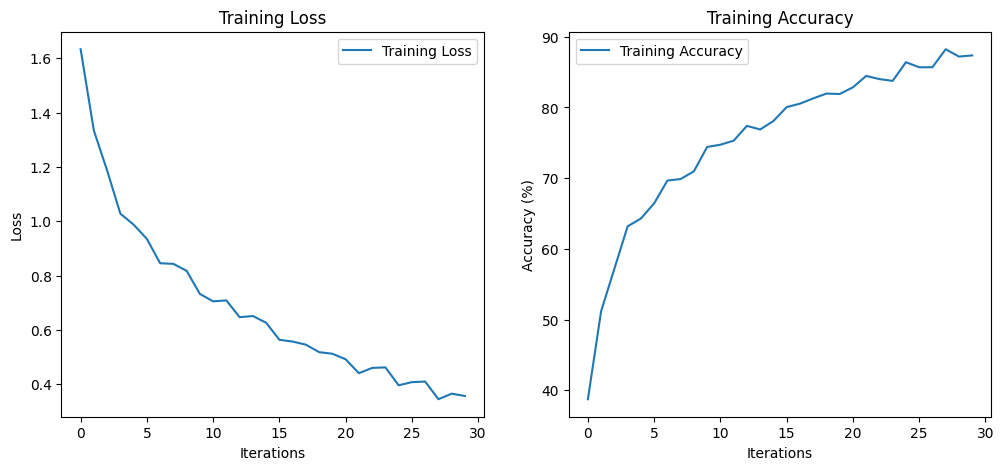

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize for 3 channels

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Adjust the CNN architecture to handle 3 channel input
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)  # Changed from 1 to 3 to handle RGB channels
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()



```
Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz
100%|██████████| 170498071/170498071 [00:05<00:00, 34080818.29it/s]
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 1.634, Accuracy: 38.73%
Epoch 1, Batch 400, Loss: 1.334, Accuracy: 51.20%
Epoch 1, Batch 600, Loss: 1.187, Accuracy: 57.20%
Epoch 2, Batch 200, Loss: 1.028, Accuracy: 63.19%
Epoch 2, Batch 400, Loss: 0.988, Accuracy: 64.30%
Epoch 2, Batch 600, Loss: 0.935, Accuracy: 66.44%
Epoch 3, Batch 200, Loss: 0.846, Accuracy: 69.66%
Epoch 3, Batch 400, Loss: 0.843, Accuracy: 69.88%
Epoch 3, Batch 600, Loss: 0.818, Accuracy: 70.98%
Epoch 4, Batch 200, Loss: 0.733, Accuracy: 74.42%
Epoch 4, Batch 400, Loss: 0.706, Accuracy: 74.73%
Epoch 4, Batch 600, Loss: 0.709, Accuracy: 75.30%
Epoch 5, Batch 200, Loss: 0.647, Accuracy: 77.40%
Epoch 5, Batch 400, Loss: 0.651, Accuracy: 76.89%
Epoch 5, Batch 600, Loss: 0.627, Accuracy: 78.09%
Epoch 6, Batch 200, Loss: 0.564, Accuracy: 80.05%
Epoch 6, Batch 400, Loss: 0.557, Accuracy: 80.54%
Epoch 6, Batch 600, Loss: 0.546, Accuracy: 81.28%
Epoch 7, Batch 200, Loss: 0.518, Accuracy: 81.97%
Epoch 7, Batch 400, Loss: 0.513, Accuracy: 81.91%
Epoch 7, Batch 600, Loss: 0.492, Accuracy: 82.85%
Epoch 8, Batch 200, Loss: 0.441, Accuracy: 84.47%
Epoch 8, Batch 400, Loss: 0.460, Accuracy: 84.02%
Epoch 8, Batch 600, Loss: 0.462, Accuracy: 83.77%
Epoch 9, Batch 200, Loss: 0.397, Accuracy: 86.41%
Epoch 9, Batch 400, Loss: 0.408, Accuracy: 85.69%
Epoch 9, Batch 600, Loss: 0.410, Accuracy: 85.70%
Epoch 10, Batch 200, Loss: 0.345, Accuracy: 88.24%
Epoch 10, Batch 400, Loss: 0.366, Accuracy: 87.20%
Epoch 10, Batch 600, Loss: 0.357, Accuracy: 87.37%
Finished Training
```

## Train & Validaiton Split

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 - Training Loss: 1.343, Accuracy: 50.61%, Validation Loss: 1.238, Accuracy: 56.06%
Epoch 2 - Training Loss: 0.986, Accuracy: 64.51%, Validation Loss: 1.094, Accuracy: 61.22%
Epoch 3 - Training Loss: 0.834, Accuracy: 70.38%, Validation Loss: 0.884, Accuracy: 68.38%
Epoch 4 - Training Loss: 0.733, Accuracy: 74.15%, Validation Loss: 0.868, Accuracy: 69.52%
Epoch 5 - Training Loss: 0.645, Accuracy: 77.44%, Validation Loss: 0.758, Accuracy: 73.86%
Epoch 6 - Training Loss: 0.583, Accuracy: 79.72%, Validation Loss: 0.819, Accuracy: 72.10%
Epoch 7 - Training Loss: 0.530, Accuracy: 81.48%, Validation Loss: 0.675, Accuracy: 77.16%
Epoch 8 - Training Loss: 0.473, Accuracy: 83.47%, Validation Loss: 1.031, Accuracy: 69.10%
Epoch 9 - Training Loss: 0.427, Accuracy: 85.10%, Validation Loss: 0.719, Accuracy: 77.06%
Epoch 10 - Training Loss: 0.387, Accuracy: 86.45%, Validation Loss: 0.636, Accuracy: 78.30%
Finished Trai

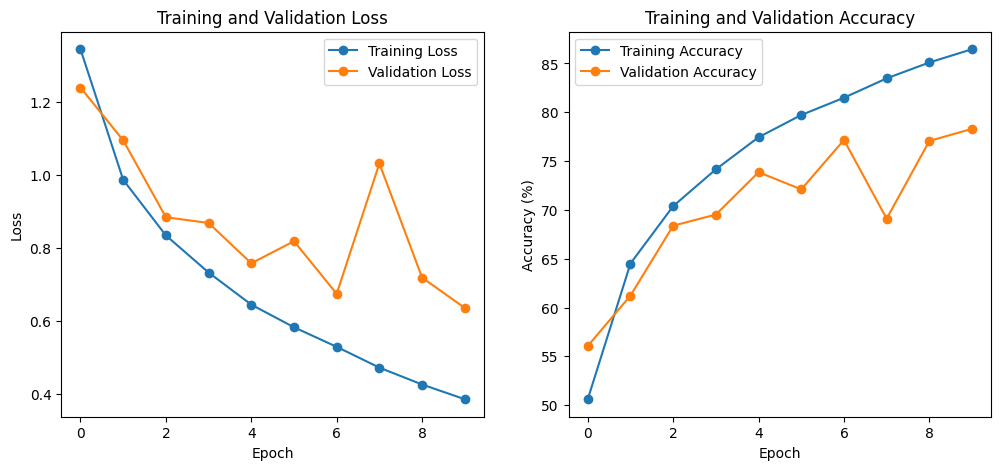

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjusted for 3 channels
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Same stratified split setup
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
targets = trainset.targets
for train_index, val_index in sss.split(np.zeros(len(targets)), targets):
    train_sampler = SubsetRandomSampler(train_index)
    val_sampler = SubsetRandomSampler(val_index)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


# Step 2: Define the CNN architecture with Global Average Pooling
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    net.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
torch.save(net.state_dict(), 'cifar10_net_tr_val_1M_GAP_BN.pt')
# prompt: save the history to numpy

import numpy as np

# Convert the training losses and accuracy lists to numpy arrays
train_losses_np = np.array(train_losses)
train_accuracy_np = np.array(train_accuracy)

# Save the numpy arrays to a file
np.save('cifar10_net_tr_val_1M_GAP_BN.npy', {'train_losses': train_losses_np, 'train_accuracy': train_accuracy_np})


# Transfer Learning with ResNet18

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Batch 200, Loss: 1.180, Accuracy: 63.67%
Epoch 1, Batch 400, Loss: 0.752, Accuracy: 75.71%
Epoch 1, Batch 600, Loss: 0.684, Accuracy: 76.94%
Epoch 1 - Training Loss: 0.841, Accuracy: 77.26%, Validation Loss: 0.621, Accuracy: 78.94%
Epoch 2, Batch 200, Loss: 0.628, Accuracy: 78.34%
Epoch 2, Batch 400, Loss: 0.634, Accuracy: 77.96%
Epoch 2, Batch 600, Loss: 0.615, Accuracy: 78.45%
Epoch 2 - Training Loss: 0.623, Accuracy: 79.61%, Validation Loss: 0.575, Accuracy: 79.80%
Epoch 3, Batch 200, Loss: 0.599, Accuracy: 79.12%
Epoch 3, Batch 400, Loss: 0.582, Accuracy: 79.95%
Epoch 3, Batch 600, Loss: 0.602, Accuracy: 79.21%
Epoch 3 - Training Loss: 0.593, Accuracy: 79.85%, Validation Loss: 0.559, Accuracy: 79.96%
Epoch 4, Batch 200, Loss: 0.564, Accuracy: 80.53%
Epoch 4, Batch 400, Loss: 0.584, Accuracy: 80.08%
Epoch 4, Batch 600, Loss: 0.588, Accuracy: 79.37%
Epoch 4 - Training Loss: 0.575, Accuracy: 80.36%, Validation Loss: 0.552, Accuracy: 80.52%
Epoch 5, Batch 200, Loss: 0.570, Acc

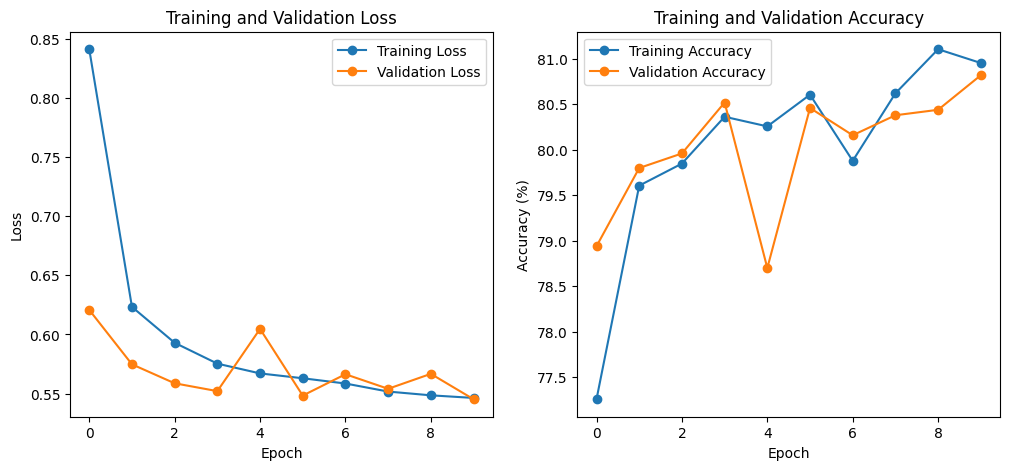

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.models as models

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit ResNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjusted for 3 channels
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Same stratified split setup
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
targets = trainset.targets
for train_index, val_index in sss.split(np.zeros(len(targets)), targets):
    train_sampler = SubsetRandomSampler(train_index)
    val_sampler = SubsetRandomSampler(val_index)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


# Step 2: Define the CNN architecture with pretrained resnet18
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Load a pretrained ResNet and modify it
        self.resnet = models.resnet18(pretrained=True)

        # Freeze all the layers in the network
        for param in self.resnet.parameters():
            param.requires_grad = False

        # CIFAR-10 has 10 classes, modify the last fully connected layer
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)  # Adjust for 10 classes

    def forward(self, x):
        return self.resnet(x)

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
train_losses_iter = []
train_accuracy_iter = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss_iter = 0.0
    running_loss = 0.0
    correct = 0
    total = 0
    net.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_loss_iter += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss_iter / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses_iter.append(avg_loss)
            train_accuracy_iter.append(accuracy)
            running_loss_iter = 0.0
            correct = 0
            total = 0

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()



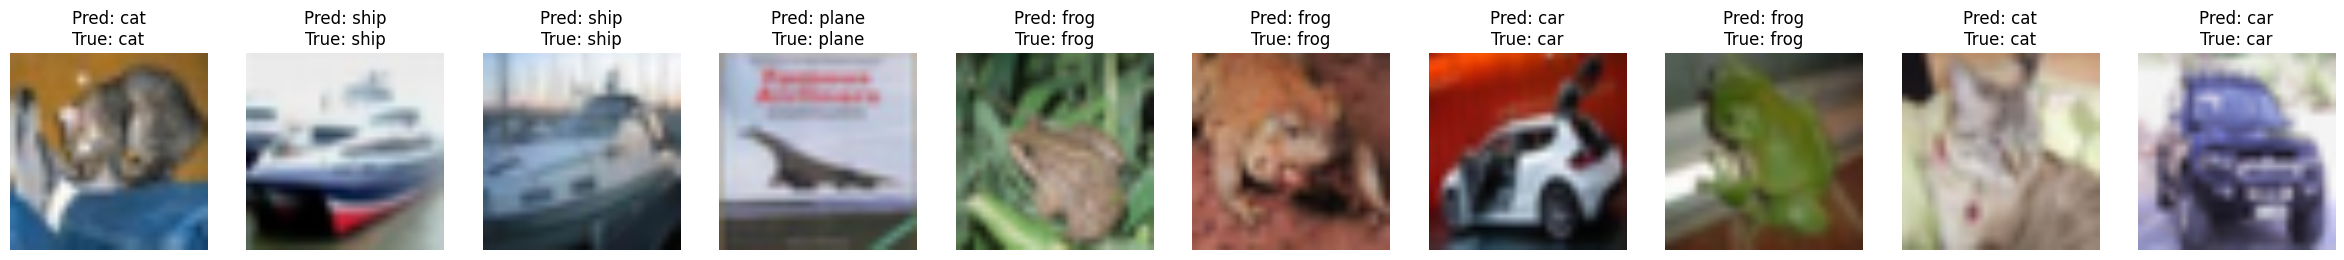

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(images, labels, predicted_labels):
    """Function to display images with labels and predictions"""
    # Set number of images to display
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    for idx in range(num_images):
        ax = axes[idx]
        img = images[idx] / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.axis('off')
        # Set title with predicted and true labels
        ax.set_title(f'Pred: {classes[predicted_labels[idx]]}\nTrue: {classes[labels[idx]]}')

# Load a batch of images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels
predicted_outputs = net(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)

# Show images with annotations
imshow(images[:10], labels[:10], predicted[:10])
plt.show()


Predicted:  cat   ship  ship  plane frog 
True:       cat   ship  ship  plane frog 


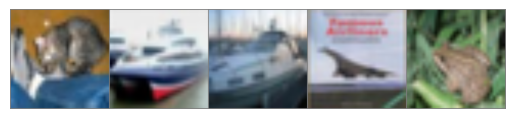

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:5]))
# Print labels
predicted_outputs = net(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(5)))
print('True:      ', ' '.join(f'{classes[labels[j]]:5s}'
                              for j in range(5)))

plt.show()
